In [29]:
### Outliers Detection

In [1]:
import pandas as pd 
df = pd.read_csv('bhp (1).csv') 
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

### Note:- 
From above, you can see that the max price is 12000000 and 267 as min price, which are outliers 

### Using percentile method

In [28]:
df.price_per_sqft.min(), df.price_per_sqft.max(), 

(np.int64(267), np.int64(12000000))

In [5]:
lower, upper = df.price_per_sqft.quantile([0.001, 0.999]) 
lower, upper

(1366.184, 50959.36200000098)

In [9]:
new_df = df[(df.price_per_sqft > lower) & (df.price_per_sqft < upper)] 
new_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


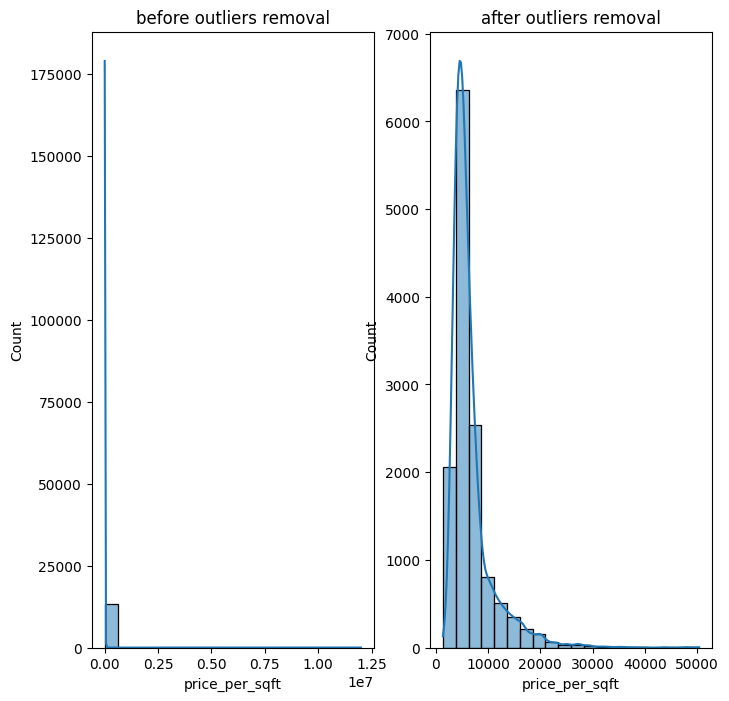

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 2, figsize=(8, 8))

sns.histplot(df.price_per_sqft, bins=20, kde=True, ax = ax[0]) 
ax[0].set_title("before outliers removal")


sns.histplot(new_df.price_per_sqft, bins=20, kde=True, ax = ax[1]) 
ax[1].set_title("after outliers removal")

plt.show()

### Using 4-standard deviation

In [19]:
new_df["zscore"] = (new_df.price_per_sqft - new_df.price_per_sqft.mean()) / new_df.price_per_sqft.std() 
new_df.head()

C:\Users\GANESH REDDY\AppData\Local\Temp\ipykernel_6380\429764787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["zscore"] = (new_df.price_per_sqft - new_df.price_per_sqft.mean()) / new_df.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [21]:
new_df[new_df.zscore > 4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [24]:
new_df.shape

(13172, 8)

In [23]:
new_df2 = new_df[(new_df.zscore >= -4) & (new_df.zscore <= 4)] 
new_df2.shape

(13047, 8)

In [26]:
13172 - 13047
# 125 are removed

125

### Final dataframe (outlier free)

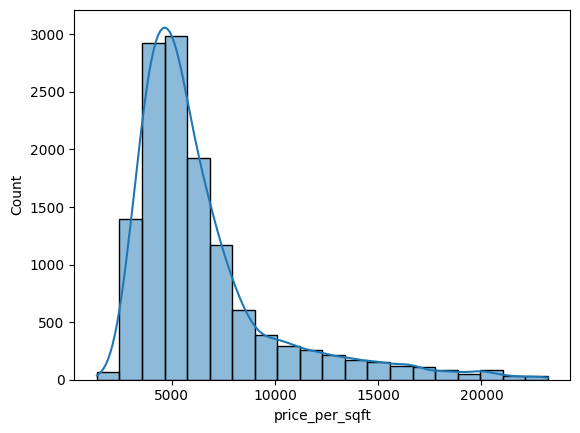

In [27]:
sns.histplot(new_df2.price_per_sqft, kde=True, bins=20) 
plt.show()

### Outcome:- 
1. So in step-1 we removed outliers using percentile method
2. Later for new_df missing and edge-cased outliers are removed by using z-score
3. At each step you can observe the bell-curve shape
4. Finally we removed the outliers whose behaviour is weired...